# Data Set Information and Source

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Source: Dr. Daqing Chen, Course Director: MSc Data Science. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK. 

Link: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

# Data Import and Merging

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from config import api_key
import requests
import json

# Filepath of the CSV files
csv_path_1 ='Resources/Year 2009-2010.csv'
csv_path_2 ='Resources/Year 2010-2011.csv'

# Read through CSV files via Pandas
df1=pd.read_csv(csv_path_1, encoding="ISO-8859-1")
df2=pd.read_csv(csv_path_2, encoding="ISO-8859-1")

# Merge the files
dataset = df1.append([df2])

# Display dataframe
dataset.head()

,ï»¿Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom


# Exploring the Data

In [2]:
# Check out the dataframe using describe and info
dataset.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ï»¿Invoice   1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [4]:
dataset.keys()

Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
dataset.count()

ï»¿Invoice     1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64

Number of customer IDs being less than invoices means that some people did not register and checked out as a guest.

In [6]:
dataset['ï»¿Invoice'] = dataset['ï»¿Invoice'].astype(str)
dataset['StockCode'] = dataset['StockCode'].astype(str)
dataset['Description'] = dataset['Description'].astype(str)
dataset['InvoiceDate'] = dataset['InvoiceDate'].astype(str)
dataset['Country'] = dataset['Country'].astype(str)

In [7]:
dataset=dataset.rename(columns= {"ï»¿Invoice":"Invoice Number",
                                 "StockCode": "Stock Code",
                                 "InvoiceDate": "Invoice Date",
                                 })

# Refunds-related Data
The following code extracts the refunds-related data from the main dataset for ease of sales analysis.

In [8]:
# Clean dataset and remove returns and refunds
dataset.drop(dataset.loc[dataset['Quantity']<0].index, inplace=True)
dataset.drop(dataset.loc[dataset['Price']<0].index, inplace=True)

In [9]:
 # Remove the rows with unspecified countries from dataset
dataset.loc[dataset['Country'] != 'Unspecified']

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France


# Augmentation of the Data

In [10]:
#This is to split the date and time out as separate date and time
dataset['Dates'] = pd.to_datetime(dataset['Invoice Date']).dt.date
dataset['Hour'] = pd.to_datetime(dataset['Invoice Date']).dt.hour
dataset.head()

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,7
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,7


In [11]:
#This is to convert the dates to datetime format and then converting the date to day of the week
dataset['Dates'] = pd.to_datetime(dataset['Dates'])
dataset['Day of Week'] = dataset['Dates'].dt.day_name()
dataset

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Hour,Day of Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,7,Monday
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,7,Monday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France,2011-09-12,12,Monday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12,Monday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12,Monday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France,2011-09-12,12,Monday


Weekend vs. weekdays - Nich

# Shopping trends by month and by year for each country
 Rename suggestion : Volume of Monthly and Annual Orders

In [12]:
# extract year from datetime located in 'Dates' column
dataset['Year'] = pd.DatetimeIndex(dataset['Dates']).year
# extract month from datetime located in 'Dates' column
dataset['Month'] = pd.DatetimeIndex(dataset['Dates']).month
#display dataframe
dataset

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Hour,Day of Week,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France,2011-09-12,12,Monday,2011,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12,Monday,2011,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12,Monday,2011,9
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France,2011-09-12,12,Monday,2011,9


# Number of orders per day

Here we are analysing overall the number of items being purchased each day. As it be seen, Wednesday has the lowest sales out of any other days. On Tuesdays and Thursdays, it has the highest number of orders. Although Saturday and Sundays are not far behind of being the highest orders as well.


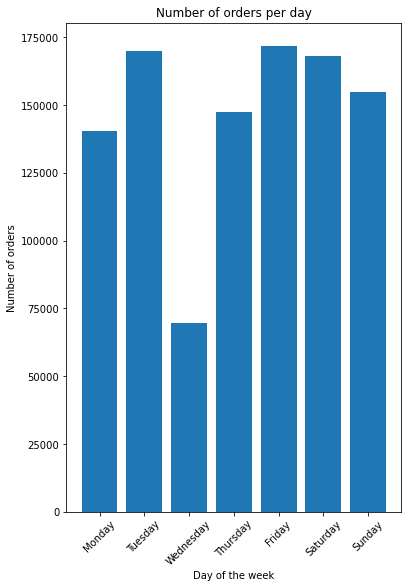

In [13]:
#Group data by day of the week
grouped_day_of_the_week = dataset.groupby(['Day of Week'])
bar_plot_data= grouped_day_of_the_week.count()

#Create a list of the day of the week
x_axis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#Plot the graph
plt.figure(figsize=(6,9))
plt.bar(x_axis,bar_plot_data['Invoice Number'], align='center')
plt.title('Number of orders per day')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Number of orders')
plt.savefig("PNG/Number of Orders per Day.png", bbox_inches="tight")

# Number of unique orders each day

In this section we are analysing the number of unique orders for each day. Similar to the overall number of order analysis, Wednesdays have the lowest number of order. On the other hand, the highest level of unique orders happens on a Friday.


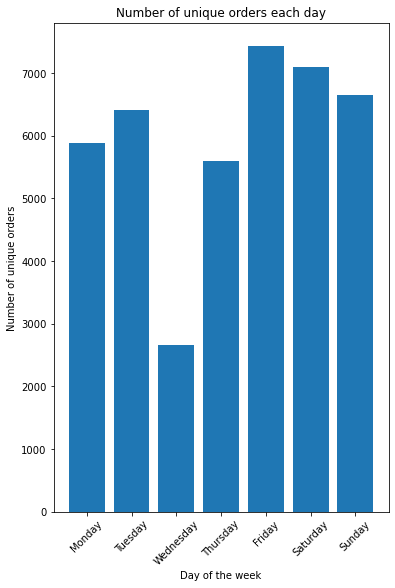

In [14]:
#Group data by day of the week
grouped_day_of_the_week = dataset.groupby(['Day of Week'])
bar_plot_data= grouped_day_of_the_week['Invoice Number'].nunique()

#Create a list of the day of the week
x_axis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#Plot the graph
plt.figure(figsize=(6,9))
plt.bar(x_axis,bar_plot_data, align='center')
plt.title('Number of unique orders each day')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Number of unique orders')
plt.savefig("PNG/Number of Unique Orders per Day.png", bbox_inches="tight")

# Average unit price of order per day

In this section, analysis on the average unit price of items is conducted. This analysis looks at whether a certain day of the week has the highest unit price sales.

As it can be seen on Thursdays it seems that the average unit price of purchase is the lowest while on Tuesdays the average unit price is the highest.


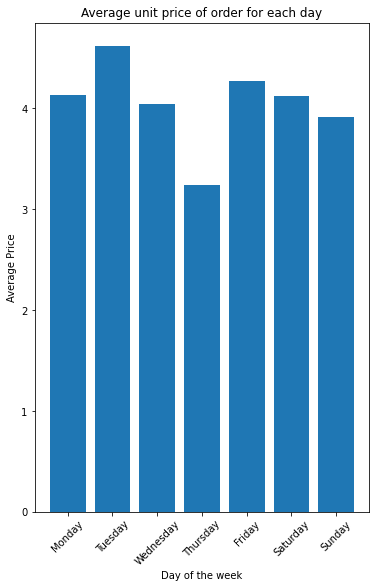

In [15]:
#Group data by day of the week
grouped_day_of_the_week = dataset.groupby(['Day of Week'])
bar_plot_data= grouped_day_of_the_week.mean()

#Create a list of the day of the week
x_axis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#Plot the graph
plt.figure(figsize=(6,9))
plt.bar(x_axis,bar_plot_data['Price'], align='center')
plt.title('Average unit price of order for each day')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.savefig("PNG/Average Unit Price of Order for Each Day.png", bbox_inches="tight")

In [16]:
# Number of products in the online store
dataset['Description'].nunique()

5469

In [17]:
# To display required columns, assign the columns to a list variable 
# and pass that variable to the indexing operator 
columns=['Invoice Number','Year', 'Month']
dataset_v1 = dataset[columns]
dataset_v1

,Invoice Number,Year,Month
0,489434,2009,1
1,489434,2009,1
2,489434,2009,1
3,489434,2009,1
4,489434,2009,1
...,...,...,...
541905,581587,2011,9
541906,581587,2011,9
541907,581587,2011,9
541908,581587,2011,9


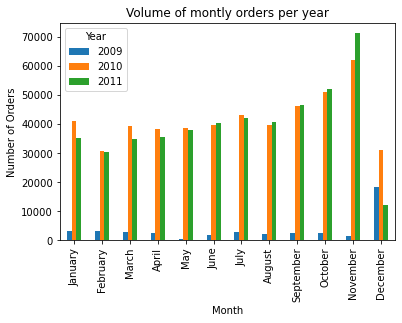

<Figure size 432x288 with 0 Axes>

In [18]:
# Use groupby to find out total orders per month and year
# Count the orders by month, spliting by year
# Display the result in a bar plot using the calculated two-level groupby
grouped_data=dataset_v1.groupby(['Month', 'Year']).size().unstack().plot(kind='bar',stacked=False)
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ('January','February','March','April','May','June','July','August','September','October','November','December')
plt.xticks(positions, labels)
plt.title("Volume of montly orders per year")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()
plt.savefig("PNG/Volume of Monthly Orders per Year.png", bbox_inches="tight")

Above chart shows the number variance of annual orders by month.
Fluctuations in the annual values could be caused by a variety of factors such as successful marketing campaigns (i.e. increase in marketing activities), expanding the market, improving customer service, etc.

In [19]:
# Create a new version of dataset to find out reasons of increased sales
dataset_v2=dataset.loc[dataset['Year']==2009]
# Number of countries in the market in year 2009
countries_2009=dataset_v2['Country'].nunique()
print(f'Number of countries in year 2009 is {countries_2009}.')

Number of countries in year 2009 is 22.


In [20]:
# Create a new version of dataset to find out reasons of increased sales
dataset_v3=dataset.loc[dataset['Year']==2010]
# Number of countries in the market in year 2010
countries_2010=dataset_v3['Country'].nunique()
print(f'Number of countries in year 2010 is {countries_2010}.')

Number of countries in year 2010 is 40.


In [21]:
# Create a new version of dataset to find out reasons of increased sales
dataset_v4=dataset.loc[dataset['Year']==2011]
# Number of countries in the market in year 2011
countries_2011=dataset_v3['Country'].nunique()
print(f'Number of countries in year 2011 is {countries_2011}.')

Number of countries in year 2011 is 40.


Above calculations shows that one of the reasons for the increased volume of sales in 2010 vs. 2009 could be the increase in the countries.

# Annual increase/decrease - Zach

In [22]:
dataset["Year"] = pd.DatetimeIndex(dataset["Dates"]).year

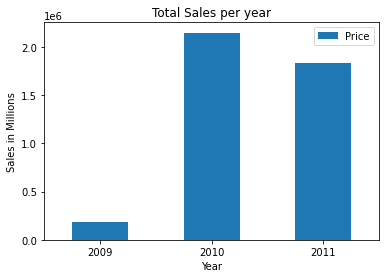

In [23]:
annual_sales = pd.set_option('display.float_format', lambda x: '%.2f' % x)
annual_sales = dataset.groupby(["Year"]).agg({'Price': 'sum'})
annual_sales_chart = annual_sales.plot.bar(rot=0, title="Total Sales per year", ylabel="Sales in Millions")
plt.savefig("PNG/Total Sales per Year.png", bbox_inches="tight")

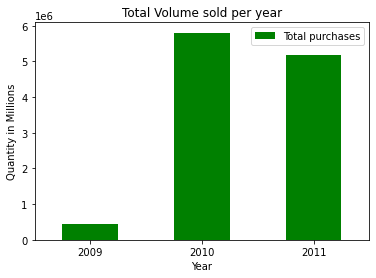

In [24]:
annual_sales["Total purchases"] = dataset.groupby(["Year"]).agg({'Quantity': 'sum'})
annual_sales = annual_sales.drop(columns="Price")
annual_sales.plot.bar(rot=0, title="Total Volume sold per year", color="green",ylabel="Quantity in Millions", width=0.5)
plt.savefig("PNG/Total Volume Sold per Year.png", bbox_inches="tight")

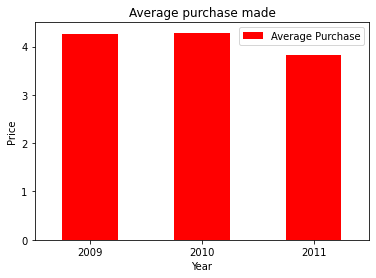

In [25]:
annual_sales["Average Purchase"] = dataset.groupby(["Year"]).agg({'Price': 'mean'})
annual_sales = annual_sales.drop(columns="Total purchases")
annual_sales.plot.bar(rot=0, title="Average purchase made", color="red",ylabel="Price")
plt.savefig("PNG/Average Purchase Made.png", bbox_inches="tight")

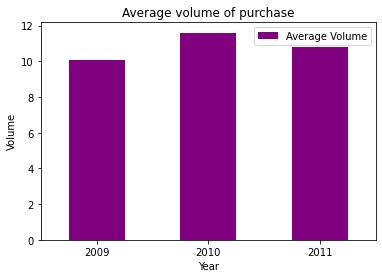

In [26]:
annual_sales["Average Volume"] = dataset.groupby(["Year"]).agg({'Quantity': 'mean'})
annual_sales = annual_sales.drop(columns="Average Purchase")
annual_sales.plot.bar(rot=0, title="Average volume of purchase", color="purple",ylabel="Volume")
plt.savefig("PNG/Average Volume of Purchase.png", bbox_inches="tight")

In [27]:
customer_sales_data = annual_sales = pd.set_option('display.float_format', lambda x: '%.2f' % x)
annual_sales = dataset.groupby(["Customer ID"]).agg({'Price': 'sum'})
annual_sales["Volume"] = dataset.groupby(["Customer ID"]).agg({'Quantity': 'sum'})
annual_sales = annual_sales.dropna()
annual_sales

,Price,Volume
Customer ID,,
12346.00,207.40,74285
12347.00,602.22,3162
12348.00,153.10,2713
12349.00,1477.70,1588
12350.00,17.15,136
...,...,...
18283.00,1677.20,1691
18284.00,91.09,494
18285.00,100.20,145


In [28]:
annual_sales = annual_sales.sort_values(by='Price', ascending=False)
annual_sales

,Price,Volume
Customer ID,,
14911.00,56099.23,148168
17841.00,34524.47,36803
14096.00,32331.19,16118
14156.00,23654.20,164202
12748.00,21220.31,37450
...,...,...
14033.00,0.19,576
15118.00,0.17,1440
14827.00,0.00,5


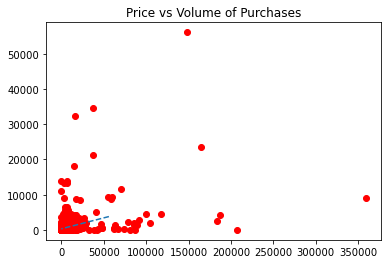

<Figure size 432x288 with 0 Axes>

In [29]:
x = annual_sales["Volume"]
y = annual_sales["Price"]
scatterplot2 = plt.scatter(x=x, y=y, color="red")
as_slope, as_int, as_r, as_p, as_std_err = stats.linregress(x, y)
as_fit = as_slope * y + as_int
plt.plot(y,as_fit,"--")
plt.title("Price vs Volume of Purchases")
plt.show()
plt.savefig("PNG/Price vs Volume of Purchases.png", bbox_inches="tight")

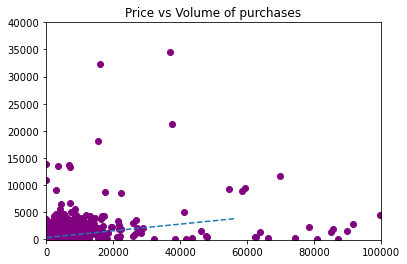

<Figure size 432x288 with 0 Axes>

In [30]:
x = annual_sales["Volume"]
y = annual_sales["Price"]
scatterplot2 = plt.scatter(x=x, y=y, color="purple", vmax=40000)
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
m_fit = m_slope * y + m_int
plt.plot(y,m_fit,"--")
plt.title("Price vs Volume of purchases")
plt.xlim(-100,100000)
plt.ylim(-100,40000)
plt.show()
plt.savefig("PNG/Price vs Volume of purchases.png", bbox_inches="tight")

In [31]:
quartiles = annual_sales["Price"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(quartiles)
print(iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

0.25    63.55
0.50   164.08
0.75   430.50
Name: Price, dtype: float64
366.9499999999997
-486.8749999999995
980.9249999999993


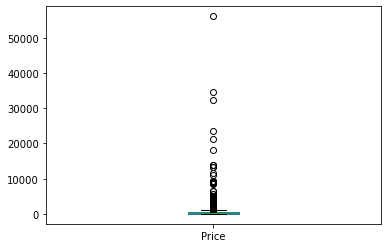

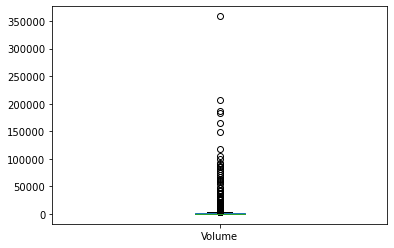

In [32]:
annual_sales.plot.box(x="Volume")
annual_sales.plot.box(x="Price")
plt.savefig("PNG/Price & Volume Outliers.png", bbox_inches="tight")

In [33]:
quartiles = annual_sales["Volume"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(quartiles)
print(iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

0.25    187.00
0.50    483.00
0.75   1346.00
Name: Volume, dtype: float64
1159.0
-1551.5
3084.5


# Most popular item by country and overall - Miley

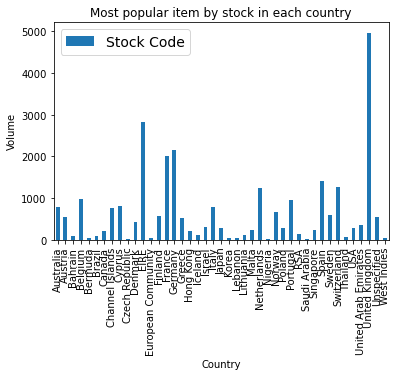

<Figure size 6480x2160 with 0 Axes>

In [34]:
item_ID_df = dataset.groupby("Country").nunique()["Stock Code"]
item_ID = item_ID_df.plot.bar(title= "Most popular item by stock in each country")

item_ID.set_xlabel("Country")
item_ID.set_ylabel("Volume")
plt.legend(fontsize = 14)
plt.rcParams["figure.figsize"] = (90,30)
plt.show()
plt.savefig("PNG/Most Popular Item by Stock in Each Country.png", bbox_inches="tight")

In [35]:
stock_id = dataset.groupby("Stock Code")
count_stock = stock_id["Stock Code"].count()
count_stock

Stock Code
10002           386
10002R            3
10080            31
10109             1
10120            77
               ... 
gift_0001_60      2
gift_0001_70      3
gift_0001_80      3
gift_0001_90      2
m                 5
Name: Stock Code, Length: 4979, dtype: int64

In [36]:
item_ID_df = dataset.groupby(["Stock Code"])
sum_item = item_ID_df.sum()
sum_item.head()

,Quantity,Price,Customer ID,Hour,Year,Month
Stock Code,,,,,,
10002,8765,380.45,4696667.00,4952,775879,2422
10002R,4,15.40,0.00,48,6028,15
10080,597,14.14,430314.00,387,62331,216
10109,4,0.42,14159.00,12,2009,3
10120,680,18.37,1058585.00,1020,154784,551


In [37]:
country_id = dataset.groupby("Country")
count_country = country_id["Country"].count()
count_country

Country
Australia                 1783
Austria                    907
Bahrain                    116
Belgium                   2993
Bermuda                     34
Brazil                      94
Canada                     228
Channel Islands           1553
Cyprus                    1138
Czech Republic              25
Denmark                    762
EIRE                     17050
European Community          60
Finland                   1023
France                   13656
Germany                  16321
Greece                     651
Hong Kong                  352
Iceland                    241
Israel                     368
Italy                     1419
Japan                      465
Korea                       53
Lebanon                     55
Lithuania                  189
Malta                      273
Netherlands               4974
Nigeria                     26
Norway                    1404
Poland                     510
Portugal                  2513
RSA                        168


In [38]:
item_ID_df = dataset.groupby(["Country"])
sum_item = item_ID_df.sum()
sum_item.reset_index(inplace=True)
sum_item.head()

,Country,Quantity,Price,Customer ID,Hour,Year,Month
0,Australia,104094,6389.82,22207904.00,20694,3584952,11773
1,Austria,11341,3875.80,11338835.00,10793,1823411,6999
2,Bahrain,1157,405.03,679477.00,1402,233177,658
3,Belgium,34506,12674.10,37259504.00,36654,6017809,20739
4,Bermuda,2798,84.70,0.00,340,68340,102


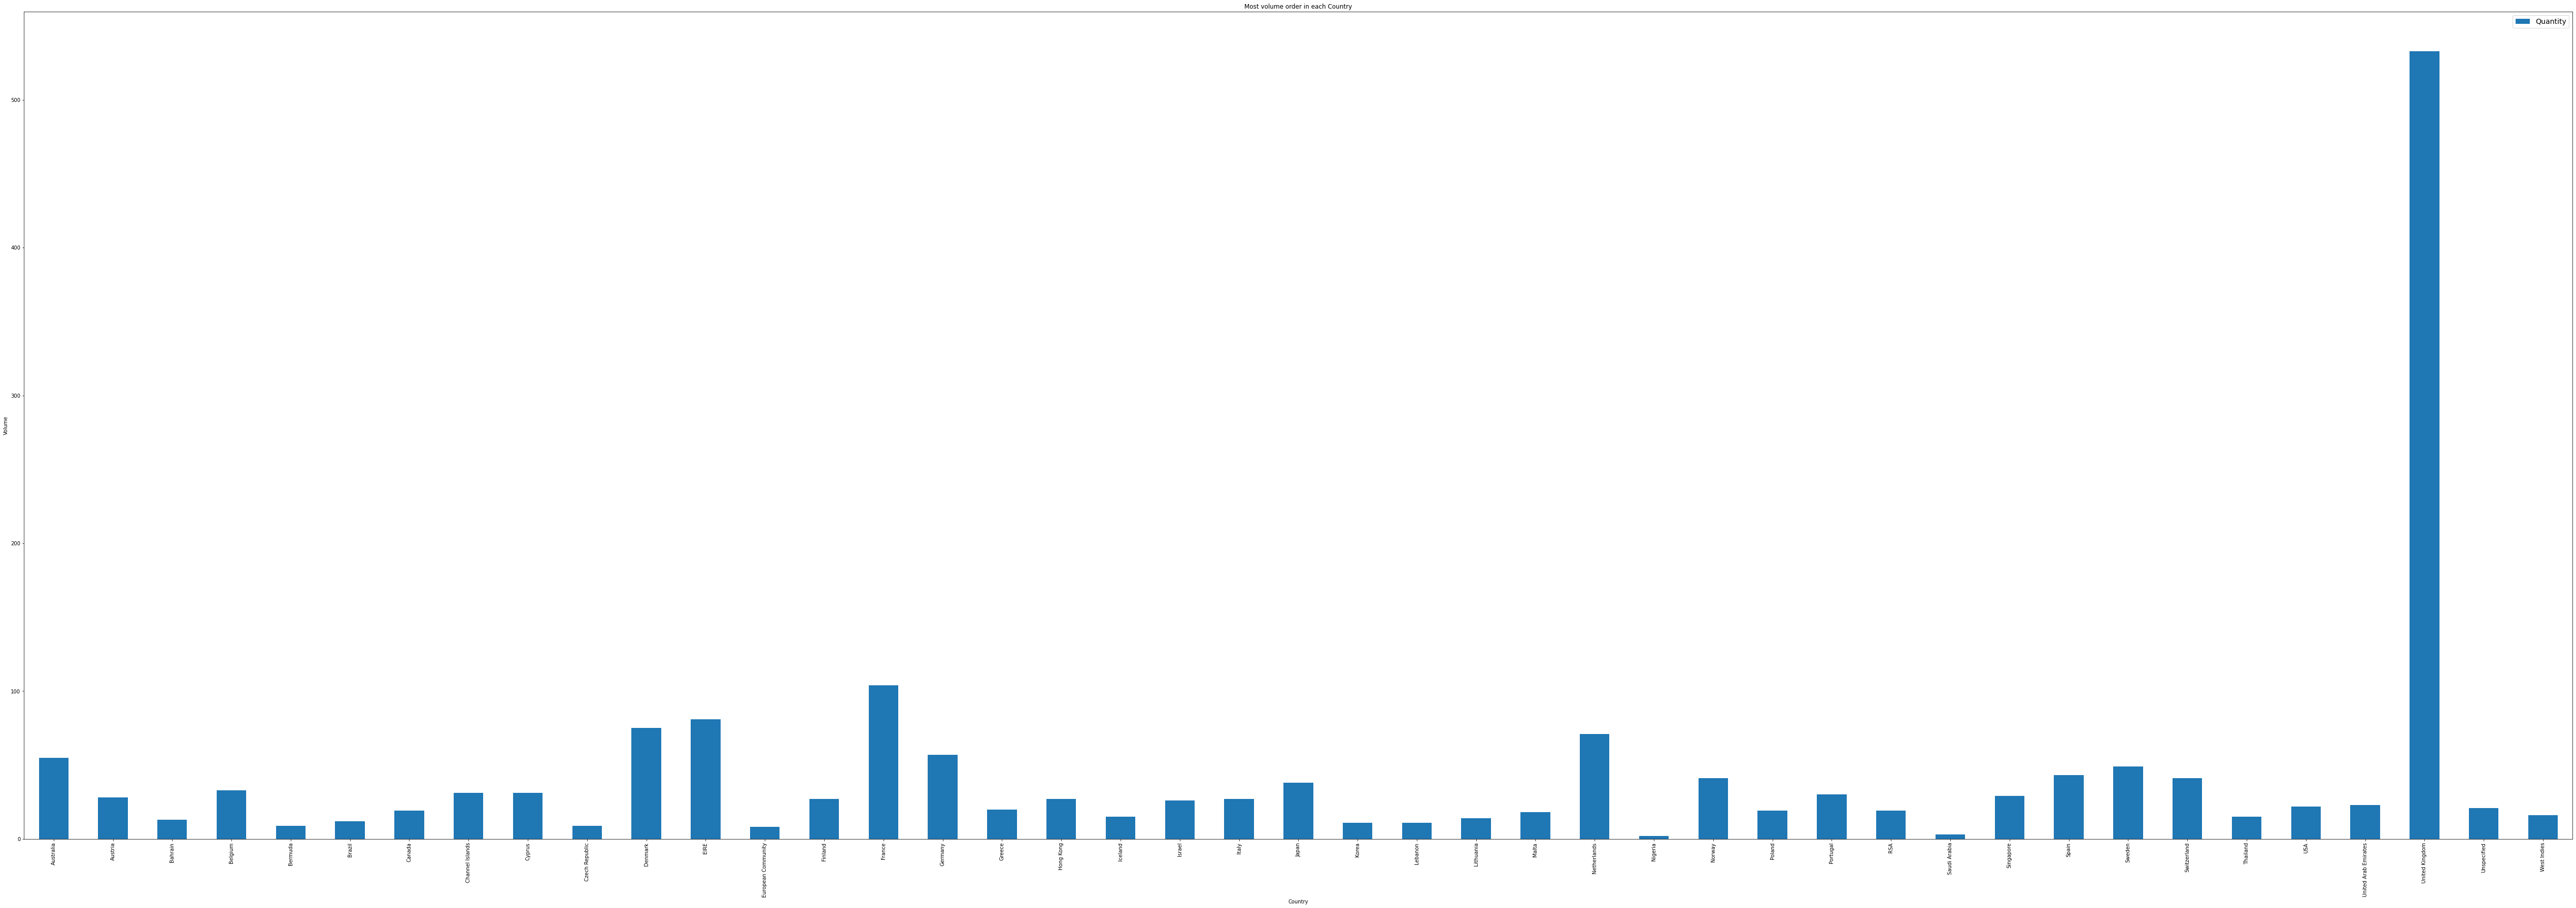

<Figure size 1080x720 with 0 Axes>

In [39]:
item_ID_df = dataset.groupby("Country").nunique()["Quantity"]
item_ID = item_ID_df.plot.bar(title= "Most volume order in each Country")

item_ID.set_xlabel("Country")
item_ID.set_ylabel("Volume")
plt.legend(fontsize = 14)
plt.rcParams["figure.figsize"] = (15,10)
plt.show()
plt.savefig("PNG/Most volume order in each Country.png", bbox_inches="tight")

# Heatmap of sales vs. country - Miley

In [40]:
sum_item["Lat"] = ""
sum_item["Lng"] = ""
sum_item.head()

,Country,Quantity,Price,Customer ID,Hour,Year,Month,Lat,Lng
0,Australia,104094,6389.82,22207904.00,20694,3584952,11773,,
1,Austria,11341,3875.80,11338835.00,10793,1823411,6999,,
2,Bahrain,1157,405.03,679477.00,1402,233177,658,,
3,Belgium,34506,12674.10,37259504.00,36654,6017809,20739,,
4,Bermuda,2798,84.70,0.00,340,68340,102,,


In [41]:
#Remove 'Unspecified' country from dataframe
data_heatmap = sum_item.loc[sum_item['Country'] != 'Unspecified']
data_heatmap.head()

,Country,Quantity,Price,Customer ID,Hour,Year,Month,Lat,Lng
0,Australia,104094,6389.82,22207904.00,20694,3584952,11773,,
1,Austria,11341,3875.80,11338835.00,10793,1823411,6999,,
2,Bahrain,1157,405.03,679477.00,1402,233177,658,,
3,Belgium,34506,12674.10,37259504.00,36654,6017809,20739,,
4,Bermuda,2798,84.70,0.00,340,68340,102,,


In [42]:
#Rename countries to allow Google API to find it's Lat and Long co-ordinates
data_heatmap['Country'].replace({"European Community": "Europe" , "RSA": "South Africa"}, inplace = True)
data_heatmap

/Users/samra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Country,Quantity,Price,Customer ID,Hour,Year,Month,Lat,Lng
0,Australia,104094,6389.82,22207904.00,20694,3584952,11773,,
1,Austria,11341,3875.80,11338835.00,10793,1823411,6999,,
2,Bahrain,1157,405.03,679477.00,1402,233177,658,,
3,Belgium,34506,12674.10,37259504.00,36654,6017809,20739,,
4,Bermuda,2798,84.70,0.00,340,68340,102,,
5,Brazil,545,256.31,1199170.00,1064,188972,686,,
6,Canada,3657,1058.09,3800513.00,2745,458431,1986,,
7,Channel Islands,21033,7221.54,23040281.00,17960,3122216,10657,,
8,Cyprus,10586,5841.52,14135914.00,13186,2287724,8698,,
9,Czech Republic,671,78.27,319525.00,220,50275,100,,


In [ ]:
#Saving dataframe to CSV
data_heatmap.to_csv("country_lat_lng.csv", index= False, header = True)
data_heatmap

In [44]:
#Read into CSV file
heatmap_df = pd.read_csv("country_lat_lng.csv")
heatmap_df

-25.274398
133.775136


In [ ]:
from config import api_key
import requests
import json
params = {"key": api_key}
# Loop through the data_heatmap and run a lat/long search for each country
for index, row in data_heatmap.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    country_name = row["Country"]
    # update address key value
    params['address'] = f"{country_name}"
    # make request
    country_lat_lng = requests.get(base_url, params=params)
    # convert to json
    country_lat_lng = country_lat_lng.json()
    data_heatmap.loc[index, "Lat"] = country_lat_lng["results"][0]["geometry"]["location"]["lat"]
    data_heatmap.loc[index, "Lng"] = country_lat_lng["results"][0]["geometry"]["location"]["lng"]

In [ ]:
#Saving dataframe to CSV
data_heatmap.to_csv("country_lat_lng.csv", index= False, header = True)
data_heatmap

#Read into CSV file
heatmap_df = pd.read_csv("country_lat_lng.csv")
heatmap_df

In [ ]:
# Import API key
import gmaps
gmaps.configure(api_key=api_key)
locations = heatmap_df[["Lat", "Lng"]]
# Plot Heatmap
fig1 = gmaps.figure()
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, point_radius=20)
# Add layer
fig1.add_layer(heat_layer)
# Display figure
fig1

# Time of the day with highest sale volume - Samra

In [ ]:
ax = dataset.Hour.value_counts().sort_index().plot(marker='o')
ax.set_xlabel("Hour")
ax.set_ylabel("Purchases Made")
ax.grid()
ax.set_xticks(range(0,25))
ax.set_title("Purchases Made per Hour")
plt.savefig("PNG/Purchases Made per Hour.png", bbox_inches="tight")

Whether people are more likely to shop online during a certain time of the day or weekdays/weekends.

Whether people are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.

Whether low unit value items are more likely to be a top 5 sales item in each country.